# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99707., 100382.,  99772.,  99672., 100745.,  99471., 100351.,
        100118.,  99965.,  99817.]),
 array([ 1.00043169, 10.90038675, 20.80034182, 30.70029689, 40.60025196,
        50.50020702, 60.40016209, 70.30011716, 80.20007222, 90.10002729,
        99.99998236]),
 <a list of 10 Patch objects>)

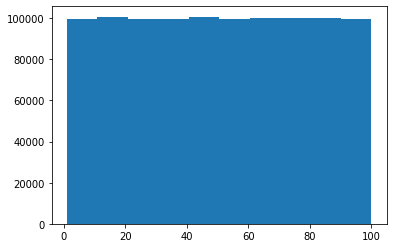

In [3]:
%matplotlib inline
plt.hist(data) #vemos que con este 'n' tan grande todos los numeros son casi equiprobables

## Distribución Normal (Gauss)

### Normal standard: $\mu=0$ y $\sigma=1$

In [4]:
data = np.random.randn(1000000)

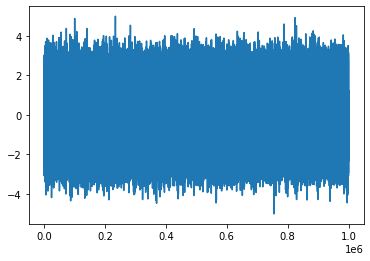

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([3.30000e+01, 1.22400e+03, 2.08840e+04, 1.33401e+05, 3.39027e+05,
        3.42945e+05, 1.39139e+05, 2.19210e+04, 1.39600e+03, 3.00000e+01]),
 array([-5.01592235, -4.01560298, -3.0152836 , -2.01496423, -1.01464485,
        -0.01432548,  0.9859939 ,  1.98631327,  2.98663265,  3.98695202,
         4.9872714 ]),
 <a list of 10 Patch objects>)

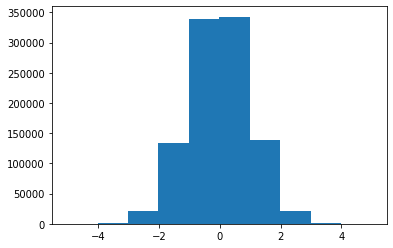

In [6]:
%matplotlib inline
plt.hist(data)

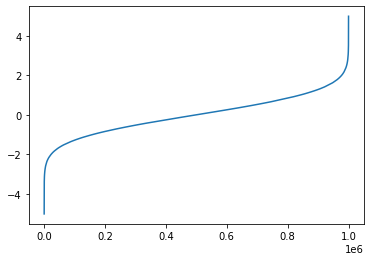

In [7]:
plt.plot(x,sorted(data)) #funcion de distribucion acumulada

### Normal con $\mu=5.5$ y $\sigma=2.5$ 
*(Nota media de 5.5 con una desviación de 2.5)*

(array([  22.,  162.,  861., 2115., 2807., 2450., 1173.,  341.,   62.,
           7.]),
 array([-3.33743534, -1.44528859,  0.44685815,  2.3390049 ,  4.23115164,
         6.12329839,  8.01544513,  9.90759188, 11.79973862, 13.69188537,
        15.58403211]),
 <a list of 10 Patch objects>)

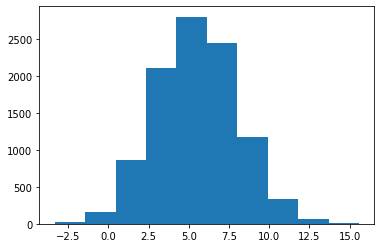

In [8]:
# Z-test-> Z-Valor = Z = (X - mu) / (sd/sqrt(N)) -> N(0,1), X = mu + sd * Z 
# con N(media, desviacion tipica)= N(m,s)
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 
plt.hist(data)

In [9]:
data = np.random.randn(2,4) #para que devuelva 2 colecciones de 4 elementos de numeros random normal(gaussiano)
data

array([[ 1.23372797, -1.16390693,  0.47762038,  0.04805819],
       [-1.17571998, -0.32581412,  0.93534783,  0.91275714]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 200), para obtener (200) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp): #realizamos n_exp experimentos
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n): #recorremos los n-valores de x,y entre 0 y 1
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n 
        # *4 ya que el metodo de MC es la probabilidad = dentro circulo/num totales de 
        # intentos=pi/4
        
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141533999999997


(3.141533999999997, [<matplotlib.lines.Line2D at 0x7f11c5096790>])

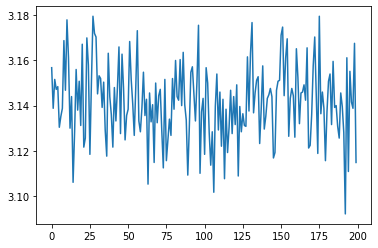

In [11]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [12]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [13]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000585,1.501516,18.490795
std,1.000339,2.499845,7.792849
min,-4.589666,-10.628450,5.000010
25%,-0.676598,-0.184444,11.745075
50%,-0.000057,1.505515,18.487075
75%,0.672645,3.188337,25.234465
max,4.694796,13.363368,31.999991


(array([1.07000e+02, 3.10300e+03, 3.21980e+04, 1.55448e+05, 3.30012e+05,
        3.16106e+05, 1.34750e+05, 2.59010e+04, 2.28900e+03, 8.60000e+01]),
 array([-4.58966646, -3.66122027, -2.73277407, -1.80432787, -0.87588167,
         0.05256453,  0.98101073,  1.90945693,  2.83790312,  3.76634932,
         4.69479552]),
 <a list of 10 Patch objects>)

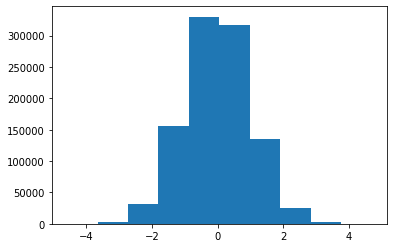

In [14]:
plt.hist(data["A"])

(array([4.70000e+01, 1.62000e+03, 2.25850e+04, 1.31518e+05, 3.22288e+05,
        3.39567e+05, 1.51385e+05, 2.86610e+04, 2.25400e+03, 7.50000e+01]),
 array([-10.62844977,  -8.22926804,  -5.83008631,  -3.43090459,
         -1.03172286,   1.36745887,   3.7666406 ,   6.16582233,
          8.56500406,  10.96418578,  13.36336751]),
 <a list of 10 Patch objects>)

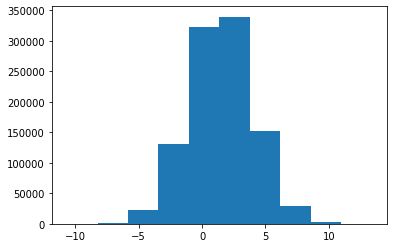

In [15]:
plt.hist(data["B"])

(array([100308.,  99856., 100146., 100481.,  99658.,  99998., 100127.,
         99848.,  99658.,  99920.]),
 array([ 5.00000979,  7.70000786, 10.40000594, 13.10000401, 15.80000209,
        18.50000016, 21.19999824, 23.89999631, 26.59999439, 29.29999247,
        31.99999054]),
 <a list of 10 Patch objects>)

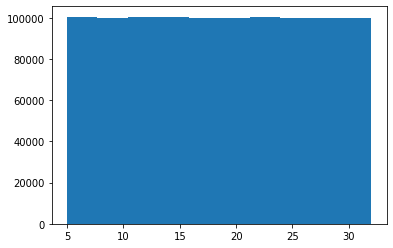

In [16]:
plt.hist(data["C"])

In [17]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [18]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
colum_names = data.columns.values.tolist()

In [20]:
a = len(colum_names)
a

21

In [21]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [22]:
new_data

,Column Name,A,B
42,State,-2.738858,0.313454
43,Account Length,-0.175252,0.370328
44,Area Code,-0.233185,0.330843
45,Phone,-0.183187,0.796026
46,Int'l Plan,-0.210350,0.091787
47,VMail Plan,-0.282352,0.696320
48,VMail Message,-0.717286,0.840563
49,Day Mins,-0.719703,0.488288
50,Day Calls,-0.301560,0.978047
51,Day Charge,0.193249,0.762679
